In [3]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_ibov = pd.read_csv("IBOVDia_09-08-22.csv")
df_ibov

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,200.372.163,"0,341"
1,ALPA4,ALPARGATAS,PN N1,201.257.220,"0,193"
2,ABEV3,AMBEV S/A,ON,4.380.195.841,"3,214"
3,AMER3,AMERICANAS,ON NM,596.875.824,"0,421"
4,ASAI3,ASSAI,ON NM,794.531.367,"0,682"
...,...,...,...,...,...
85,VALE3,VALE,ON NM,3.768.748.489,"12,817"
86,VIIA3,VIA,ON NM,1.596.295.753,"0,231"
87,VBBR3,VIBRA,ON NM,1.131.883.365,"1,016"
88,WEGE3,WEG,ON NM,1.484.859.030,"2,189"


In [5]:
df_ibov["Part. (%)"] = df_ibov["Part. (%)"].apply(lambda x: float(x.replace(",","." )))

#### Analise do histórico das 10 ações com maior participacão na bolsa carregando-os em um objeto Tickers do módulo do Yahoo.

In [6]:

acoes = df_ibov.sort_values("Part. (%)").tail(10)["Código"].values
" ".join([i + '.SA' for i in acoes])

'RENT3.SA ELET3.SA BBAS3.SA ABEV3.SA B3SA3.SA BBDC4.SA PETR3.SA ITUB4.SA PETR4.SA VALE3.SA'

In [7]:
tickers = yf.Tickers(" ".join([i + '.SA' for i in acoes]))
tickers.tickers

{'RENT3.SA': yfinance.Ticker object <RENT3.SA>,
 'ELET3.SA': yfinance.Ticker object <ELET3.SA>,
 'BBAS3.SA': yfinance.Ticker object <BBAS3.SA>,
 'ABEV3.SA': yfinance.Ticker object <ABEV3.SA>,
 'B3SA3.SA': yfinance.Ticker object <B3SA3.SA>,
 'BBDC4.SA': yfinance.Ticker object <BBDC4.SA>,
 'PETR3.SA': yfinance.Ticker object <PETR3.SA>,
 'ITUB4.SA': yfinance.Ticker object <ITUB4.SA>,
 'PETR4.SA': yfinance.Ticker object <PETR4.SA>,
 'VALE3.SA': yfinance.Ticker object <VALE3.SA>}

#### Dicionário que contem como chaves os tickers de cada ativo (PETR4.SA, por exemplo) e como valores um DataFrame contendo os dados históricos de cada 

In [8]:
dict_data = {}
for ticker in tickers.tickers.keys():
    print(f"Baixando {ticker}")
    dict_data[ticker] = tickers.tickers[ticker].history(period = "max")

Baixando RENT3.SA
Baixando ELET3.SA
Baixando BBAS3.SA
Baixando ABEV3.SA
Baixando B3SA3.SA
Baixando BBDC4.SA
Baixando PETR3.SA
Baixando ITUB4.SA
Baixando PETR4.SA
Baixando VALE3.SA


In [9]:
#Exemplo
dict_data['RENT3.SA']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-05-23 00:00:00-03:00,0.780556,0.792762,0.760211,0.779877,266301160,0.000000,0.0
2005-05-24 00:00:00-03:00,0.773096,0.783268,0.759533,0.779199,52191899,0.000000,0.0
2005-05-25 00:00:00-03:00,0.779877,0.779877,0.773096,0.779877,6933797,0.000000,0.0
2005-05-27 00:00:00-03:00,0.779877,0.779877,0.776487,0.779877,29496902,0.000000,0.0
2005-05-30 00:00:00-03:00,0.773096,0.779877,0.769705,0.779877,1789974,0.000000,0.0
...,...,...,...,...,...,...,...
2025-06-26 00:00:00-03:00,41.771962,41.771962,39.510548,39.510548,33754000,0.000000,0.0
2025-06-27 00:00:00-03:00,39.342672,40.912824,39.322921,40.043808,14095200,0.000000,0.0
2025-06-30 00:00:00-03:00,40.220001,41.220001,39.669998,40.520000,8503600,0.506194,0.0


#### combinando todos os dados em um único DataFrame, utilizando o preço de fechamento de cada ativo.

In [11]:
df_data = pd.DataFrame()
for ticker in dict_data.keys():
    df_aux= dict_data[ticker].rename(columns= {"Close" : ticker})
    df_data= df_data.join(df_aux[ticker], how = 'outer')

In [13]:
df_data

,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,17.502956,0.917159,NaN,NaN,NaN,1.283440,NaN,1.245700,2.103846
2000-01-04 00:00:00-02:00,NaN,16.656757,0.873538,NaN,NaN,NaN,1.211411,NaN,1.176789,2.053754
2000-01-05 00:00:00-02:00,NaN,17.324810,0.882487,0.338984,NaN,NaN,1.227781,NaN,1.164916,2.053754
2000-01-06 00:00:00-02:00,NaN,16.923979,0.894790,0.321801,NaN,NaN,1.217959,NaN,1.160887,2.053754
2000-01-07 00:00:00-02:00,NaN,17.191196,0.874657,0.321801,NaN,NaN,1.227781,NaN,1.166188,2.128891
...,...,...,...,...,...,...,...,...,...,...
2025-06-26 00:00:00-03:00,39.510548,39.869999,21.600000,13.320000,14.10,16.239286,34.220001,36.292656,31.459999,52.000000
2025-06-27 00:00:00-03:00,40.043808,39.700001,21.730000,13.150000,14.12,16.258913,33.799999,36.252674,31.209999,52.869999
2025-06-30 00:00:00-03:00,40.520000,40.290001,22.090000,13.320000,14.58,16.514030,34.090000,36.932350,31.379999,52.650002


#### DataFrame adicional para representar a variação percentual diária de cada ativo

In [12]:
df_ret= df_data / df_data.shift(1) -1
df_ret

,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-02:00,NaN,-0.048346,-0.047561,NaN,NaN,NaN,-0.056122,NaN,-0.055319,-0.023810
2000-01-05 00:00:00-02:00,NaN,0.040107,0.010244,NaN,NaN,NaN,0.013514,NaN,-0.010090,0.000000
2000-01-06 00:00:00-02:00,NaN,-0.023136,0.013941,-0.050691,NaN,NaN,-0.008000,NaN,-0.003458,0.000000
2000-01-07 00:00:00-02:00,NaN,0.015789,-0.022500,0.000000,NaN,NaN,0.008065,NaN,0.004566,0.036585
...,...,...,...,...,...,...,...,...,...,...
2025-06-26 00:00:00-03:00,-0.072769,0.003019,0.015992,0.012928,0.036003,0.009146,0.007359,-0.007381,0.008010,0.030111
2025-06-27 00:00:00-03:00,0.013497,-0.004264,0.006018,-0.012763,0.001418,0.001209,-0.012274,-0.001102,-0.007947,0.016731
2025-06-30 00:00:00-03:00,0.011892,0.014861,0.016567,0.012928,0.032578,0.015691,0.008580,0.018748,0.005447,-0.004161


#### Analise se é possível estimar uma maior probabilidade dos ativos permofarem bem apos um dia de queda

In [21]:
df_ret[df_ret.shift(1)<0].mean()

RENT3.SA    0.001144
ELET3.SA   -0.000161
BBAS3.SA    0.000279
ABEV3.SA    0.001040
B3SA3.SA    0.001191
BBDC4.SA    0.000753
PETR3.SA    0.000385
ITUB4.SA    0.000331
PETR4.SA    0.000569
VALE3.SA    0.000240
dtype: float64

In [22]:
df_ret[df_ret.shift(1)<0].std()

RENT3.SA    0.027291
ELET3.SA    0.030153
BBAS3.SA    0.027500
ABEV3.SA    0.018152
B3SA3.SA    0.028031
BBDC4.SA    0.024121
PETR3.SA    0.028593
ITUB4.SA    0.022556
PETR4.SA    0.028034
VALE3.SA    0.025177
dtype: float64

Média dos retornos
RENT3 - 0.1144334202190648
ELET3 - -0.01614163767808312
BBAS3 - 0.0275541741802035
ABEV3 - 0.10404252576709126
B3SA3 - 0.11878331342634223
BBDC4 - 0.0752737940979453
PETR3 - 0.03845276934233838
ITUB4 - 0.03314898952772846
PETR4 - 0.05692189619108201
VALE3 - 0.02403308990952836
Desvio padrão dos retornos
RENT3 - 2.729095713768482
ELET3 - 3.0152958719548204
BBAS3 - 2.7500545844700452
ABEV3 - 1.815179952257965
B3SA3 - 2.8032680003184125
BBDC4 - 2.412124636000552
PETR3 - 2.8593422080756628
ITUB4 - 2.255623357909089
PETR4 - 2.8033923353940624
VALE3 - 2.5176668383192475


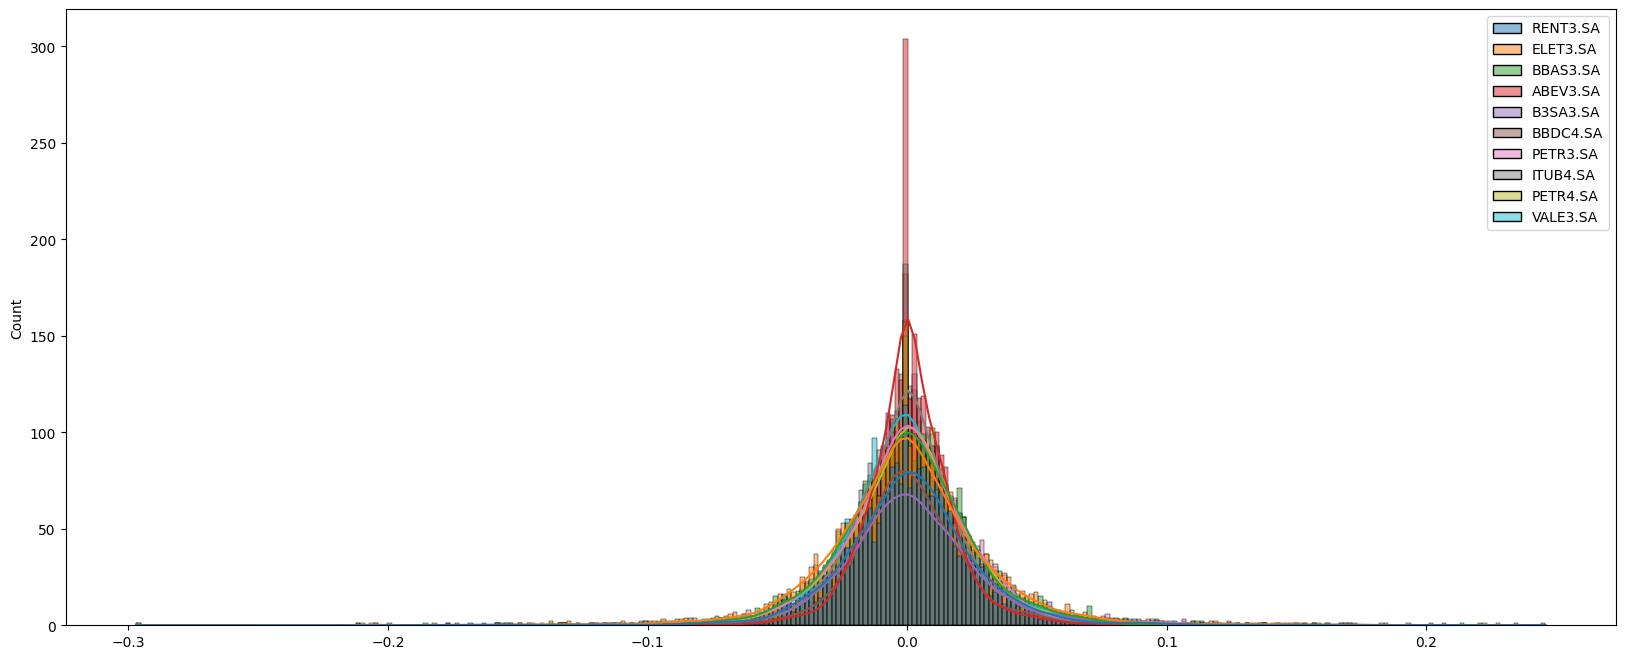

In [ ]:
df_analise = df_ret[df_ret.shift(1)<0]

fig, ax =plt.subplots(figsize=(20,8))
sns.histplot(df_analise, kde= True)

print("Média dos retornos") 
for acao in acoes:
    print(f'{acao} - {df_analise[acao + ".SA"].mean()*100}')

print("Desvio padrão dos retornos")
for acao in acoes: 
    print(f'{acao} - {df_analise[acao + ".SA"].std()*100}')

Média dos retornos
RENT3 - 0.1949440448156019
ELET3 - 0.11260312228772228
BBAS3 - 0.4629372285140361
ABEV3 - 1.1420484459690685
B3SA3 - 0.04420367815269837
BBDC4 - 1.2470143686588135
PETR3 - 0.1340099696041478
ITUB4 - 0.5178214199755423
PETR4 - 0.1169146547651922
VALE3 - 0.2518919724399931
Desvio padrão dos retornos
RENT3 - 6.182607677676312
ELET3 - 4.900714853601058
BBAS3 - 4.522150823702853
ABEV3 - 4.201294566862929
B3SA3 - 6.139793093225133
BBDC4 - 6.035221222445195
PETR3 - 5.361645999538581
ITUB4 - 4.89457326997748
PETR4 - 5.837166397491476
VALE3 - 4.8183417845590455


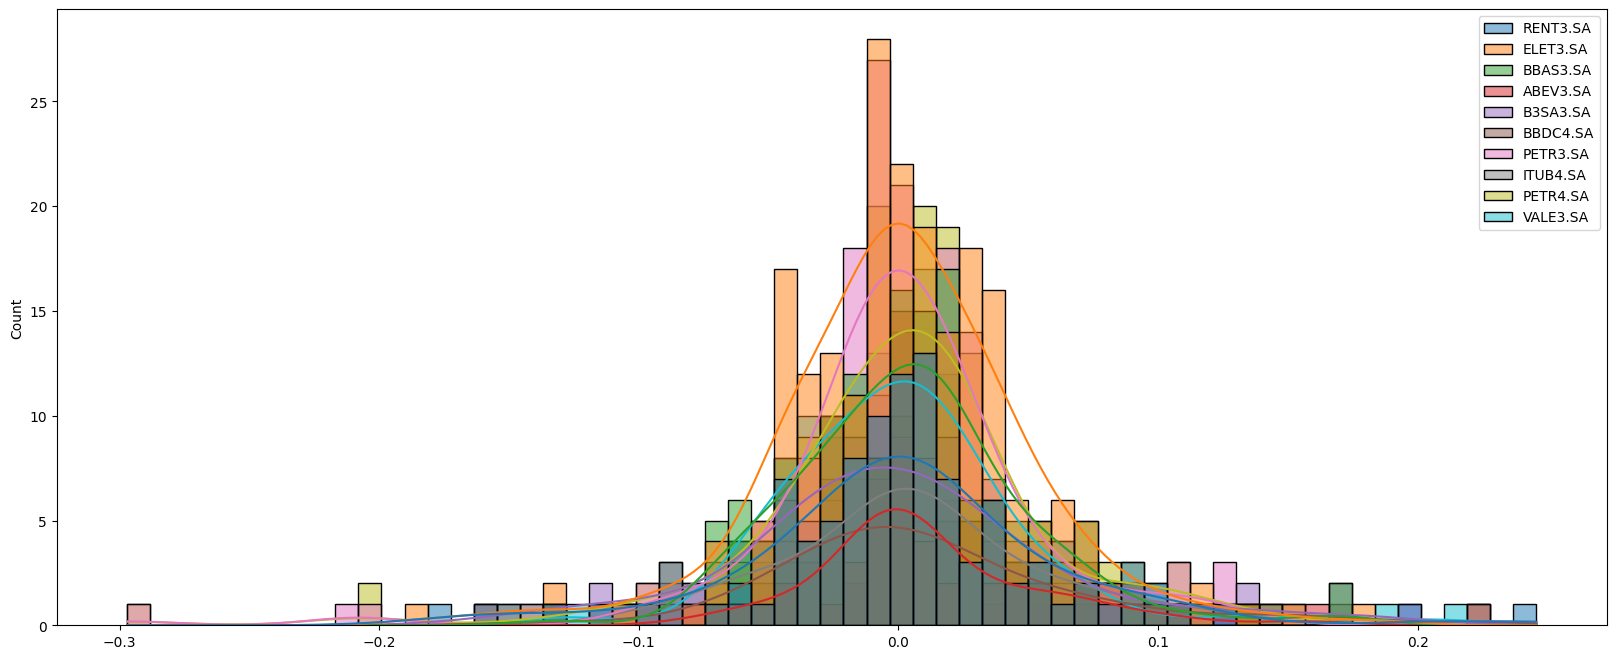

In [17]:
# Quedas de 5%
df_analise = df_ret[df_ret.shift(1)< -0.05]

fig, ax =plt.subplots(figsize=(20,8))
sns.histplot(df_analise, kde= True)

print("Média dos retornos")
for acao in acoes:
    print(f'{acao} - {df_analise[acao + ".SA"].mean()*100}')

print("Desvio padrão dos retornos")
for acao in acoes: 
    print(f'{acao} - {df_analise[acao + ".SA"].std()*100}')

#### Histórico de pagamentos de dividendos usando a yfinance.

In [18]:
df_dividends = pd.DataFrame()

for ticker in tickers.tickers.keys():
    df_dividends_aux = tickers.tickers[ticker].dividends.to_frame().rename(columns={"Dividends": ticker})
    df_dividends = df_dividends.join(df_dividends_aux, how='outer')

df_dividends['year'] = df_dividends.index.year
df_data["year"] = df_data.index.year

df_dividends_year = df_dividends.groupby("year").sum()
df_last_price = df_data.dropna().groupby("year").last()

df_dy = df_dividends_year/df_last_price  * 100
df_dy.dropna(inplace=True)

In [19]:
df_dy

,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
year,,,,,,,,,,
2008,7.763151,0.000000,0.000000,0.000000,0.688289,3.379788,4.877644,0.000000,4.860196,3.822241
2009,1.119398,0.000000,0.000000,0.000000,1.317491,1.857336,8.689744,0.000000,11.939027,1.588010
2010,0.801226,0.000000,5.975457,0.000000,1.987118,1.178613,7.068354,0.000000,14.638817,1.212817
2011,1.806483,0.000000,5.580535,0.000000,8.546433,6.573711,12.849981,0.000000,16.592381,4.921931
2012,1.491517,0.000000,2.381544,0.000000,4.694010,3.706407,8.204393,0.000000,9.720349,0.000000
2013,5.433794,0.000000,7.420315,0.000000,7.351993,5.226795,0.000000,0.000000,8.470705,0.521458
2014,1.676079,0.000000,4.067661,3.499229,5.845398,5.375926,17.200343,0.000000,34.531033,6.729915
2015,3.255658,0.000000,11.518139,12.085458,9.758397,11.779625,0.000000,0.000000,0.000000,10.569519
2016,3.074492,0.000000,1.187531,5.140804,3.935161,7.100111,0.000000,0.000000,0.000000,0.909007


#### Desempenho de uma estratégia de investimento que monta uma carteira de ações ano a ano com as 3 maiores pagadoras de dividendo do ano anterior, comparada com o desempenho de uma carteira global.

<Axes: xlabel='year'>

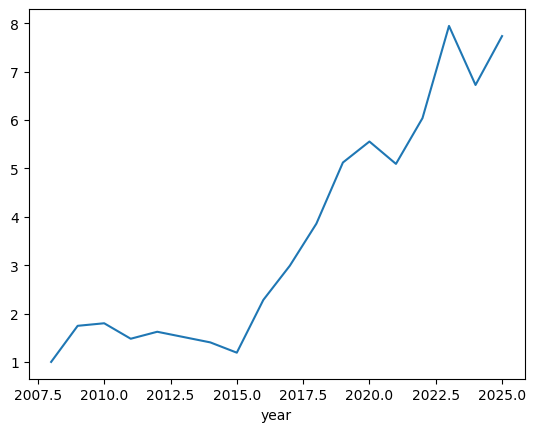

In [23]:
df_ret_year = df_last_price / df_last_price.shift(1) - 1
((df_ret_year / 10).sum(axis=1) + 1).cumprod().plot()

<Axes: xlabel='year'>

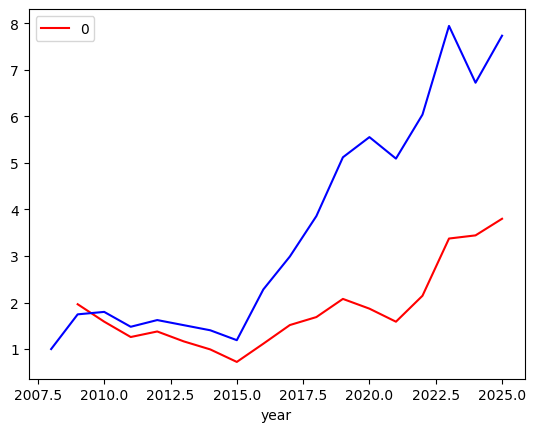

In [24]:
strategy_return = []

for i in range(len(df_dy) - 1):
    stocks = df_dy.iloc[i, :].nlargest(3).index 
    strategy_return += [(df_ret_year[stocks].iloc[i + 1] / 3).sum() + 1]

df_global = df_ret_year / 10

fig, ax = plt.subplots()
pd.DataFrame(strategy_return, index=df_global.index[1:]).cumprod().plot(color="red", ax=ax)
(df_global.sum(axis=1) + 1).cumprod().plot(color="blue", ax=ax)